
# <p style="text-align: center;">EE 461P: Data Science Principles</p>
# <p style="text-align: center;">Assignment 3</p>
## <p style="text-align: center;">Total points: 60</p>
## <p style="text-align: center;">Due: Tuesday, October 24th, submitted via Canvas by 11:59 pm</p>

### Xiaoyong Liang xl5432
### Scott Fennell sp363


Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1 - Gradient Descent (5+8+2=15pts)

In this question you will implement vanilla SGD and an adaptive gradient update technique called Adagrad. In addition, you will also implement ridge regularization. 

1. Using stochastic gradient descent, derive the coefficent updates for all 4 coefficients of the model: $$ y = w_0 + w_1*x_1 + w_2*x_1*x_2 + w_3*x_2 $$ Hint: start from the cost function (Assume sum of squared error). If you write the math by hand, submit that as a separate file and make a reference to it in your notebook or include the image in your notebook.
2. Write Python code for an SGD solution to the non-linear model $$ y = w_0 + w_1*x_1 + w_2*x_1*x_2 + w_3*x_2$$ Try to format similarly to scikit-learn's models. Your class should take as input the learning_rate, regularization_constant and number of epochs. The fit method must take as input X,y and a choice of update_rule as 'SGD' or 'adagrad' (Notes on implementation below). The _predict_ method takes an X value (optionally, an array of values). Use your new gradient descent regression to predict the data given in 'samples.csv', for 10 epochs, using learning rates: [.0001, .001, .01, 0.1, 1, 10, 100] and regularization constants in the range: [0,10,100] . Plot MSE and the $w$ parameters as a function of epoch count (10 epochs) for the best 2 combinations of learning_rate and regularization for both SGD and Adagrad. ie you should have 2 plots of MSE and parameter updates for SGD and adagrad each. Report the MSE at the end of 10 epochs for all 4 combinations.
3. Based on the experiments, answer the following:

1. Which of the 2 techniqes allows for larger initial setting of the learning_rate? Why?
2. What would a drawback of adagrad be? How could this be fixed? (Hint: Adadelta)

# Notes on Adagrad
Adagrad (http://ruder.io/optimizing-gradient-descent/) differs from vanilla SGD in that the learning rate of each weight changes over updates. A cache is maintained that holds the sum of squares of all gradients upto the current update. The learning_rate is divided by the cache, resulting in a different learning rate for each weight. A consequence of this update rule is that weights that have already seen large gradients (made large jumps) make smaller updates in subsequent iterations.
Specifically, the steps can be listed as below:
1. cache = cache + (gradients^2)
2. weights = weights + ((learning_rate)/sqrt(cache+1e-6))*gradients

# (Optional) Notes on Training with Gradient Descent
1. Compute error: This consists of a prediction error and a regularization term. From an implementation perspective, this is a function that takes as input the truth, prediction and regularization hyperparameter and returns an error
2. Compute gradients: Take a derivative of the error in terms of the weights. This can be modelled as a function that takes as input the error and features and returns the gradients for each weight
3. Update weights: Weight updates can be done using vanilla SGD or adaptive techniques. The update function takes as inputs the gradient and hyperparameters and returns the new weights.

# ANSWER

## a)

<img src="img/q1.JPG" width="400" height="600" >

## b)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
%matplotlib inline

class SGD:
    def __init__(self, learning_rate, regularization_constant, num_epochs):
        self.learning_rate = learning_rate
        self.regularization_constant = regularization_constant
        self.num_epochs = num_epochs
        self.coef_ = [0, 0, 0, 0]
        self.coefficients = []
        self.mses = []
        self.losses = 0
        
    def fit(self, X, y, update_rule):
        x1 = X['x_1']
        x2 = X['x_2']
        x1x2 = X['x_1'] * X['x_2']
        
        cache = [0, 0, 0, 0]
        for epoch in range(self.num_epochs):
            loss = []
            for i in range(len(x1)):
                predictY = self.coef_[0] + self.coef_[1]*x1[i] + self.coef_[2]*x1x2[i] + self.coef_[3]*x2[i]
                                
                grad = [0,0,0,0]
                grad[0] = predictY - y[i] + self.coef_[0]
                grad[1] = grad[0]*x1[i] + self.coef_[1]
                grad[2] = grad[0]*x1x2[i] + self.coef_[2]
                grad[3] = grad[0]*x2[i] + self.coef_[3]
                
                if(update_rule is "adagrad"):
                    cache[0] += grad[0]**2
                    cache[1] += grad[1]**2
                    cache[2] += grad[2]**2
                    cache[3] += grad[3]**2
                
                    self.coef_[0] = self.coef_[0] - (self.learning_rate)/np.sqrt(cache[0] + 1e-6) * (grad[0] + self.regularization_constant * self.coef_[0])
                    self.coef_[1] = self.coef_[1] - (self.learning_rate)/np.sqrt(cache[1] + 1e-6) * (grad[1] + self.regularization_constant * self.coef_[1])
                    self.coef_[2] = self.coef_[2] - (self.learning_rate)/np.sqrt(cache[2] + 1e-6) * (grad[2] + self.regularization_constant * self.coef_[2])
                    self.coef_[3] = self.coef_[3] - (self.learning_rate)/np.sqrt(cache[3] + 1e-6) * (grad[3] + self.regularization_constant * self.coef_[3])
                    
                elif update_rule is "SGD":
                    self.coef_[0] = self.coef_[0] - self.learning_rate * (grad[0] + self.regularization_constant * self.coef_[0])
                    self.coef_[1] = self.coef_[1] - self.learning_rate * (grad[1] + self.regularization_constant * self.coef_[1])
                    self.coef_[2] = self.coef_[2] - self.learning_rate * (grad[2] + self.regularization_constant * self.coef_[2])
                    self.coef_[3] = self.coef_[3] - self.learning_rate * (grad[3] + self.regularization_constant * self.coef_[3])

                loss.append((y[i]-predictY)**2 )
            mse = np.mean(np.array(loss))
            self.mses.append(mse)
            
            if epoch is self.num_epochs - 1:
                self.losses = mse
    
    def predict(self, X):
        x1 = X['x_1']
        x2 = X['x_2']
        x1x2 = X['x_1'] * X['x_2']

        y = self.coef_[0] + self.coef_[1]*x1 + self.coef_[2]*x1x2 + self.coef_[3]*x2

        return y 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:53: RuntimeWarning: overflow encountered in double_scalars
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in double_scalars
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in double_scalars
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in double_scalars
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in double_scalars
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars
/Library/Frameworks/Python.fram

SGD:
Smallest mse: 5.06174503986 reg const: 0 learning rate: 0.0001


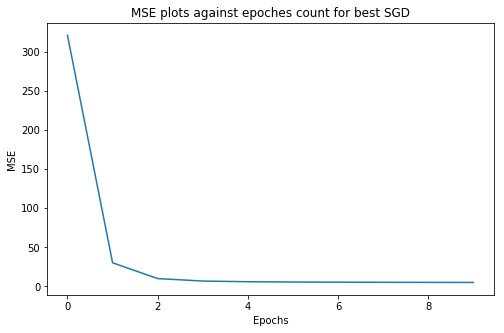

Second smallest mse: 6.76638998091 reg const: 0 learning rate: 0.001


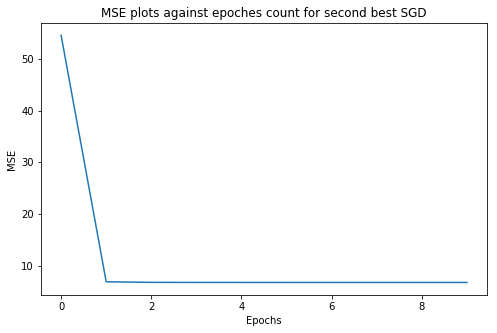

In [2]:
df = pd.read_csv('samples.csv')
X_train, X_test, y_train, y_test = train_test_split(df[['x_1', 'x_2']], df['y'], test_size = 0, random_state = 10)


losses_sgd = []
mses_sgd = []
regConsts_sgd = []
learningRates_sgd = []
num_epochs_sgd = 10
for learning_rate in [.0001, .001, .01, 0.1, 1, 10, 100]:
    for regularization_constant in [0,10,100]:
        mySGD = SGD(learning_rate, regularization_constant, 10)
        mySGD.fit(X_train, y_train, "SGD")
        #predictedY = mySGD.predict(X_test)
        losses_sgd.append(mySGD.losses)
        mses_sgd.append(mySGD.mses)
        regConsts_sgd.append(regularization_constant)
        learningRates_sgd.append(learning_rate)

print("SGD:")
print("Smallest mse:", min(losses_sgd), "reg const:", regConsts_sgd[losses_sgd.index(min(losses_sgd))],"learning rate:", learningRates_sgd[losses_sgd.index(min(losses_sgd))])

fig = plt.figure(figsize=(8,5))
plt.plot(np.arange(10), mses_sgd[losses_sgd.index(min(losses_sgd))])
plt.title('MSE plots against epoches count for best SGD')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

regConsts_sgd.remove(regConsts_sgd[losses_sgd.index(min(losses_sgd))])
learningRates_sgd.remove(learningRates_sgd[losses_sgd.index(min(losses_sgd))])
losses_sgd.remove(min(losses_sgd))
mses_sgd.remove(mses_sgd[losses_sgd.index(min(losses_sgd))])

print("Second smallest mse:", min(losses_sgd), "reg const:", regConsts_sgd[losses_sgd.index(min(losses_sgd))],"learning rate:", learningRates_sgd[losses_sgd.index(min(losses_sgd))])

fig = plt.figure(figsize=(8,5))
plt.plot(np.arange(10), mses_sgd[losses_sgd.index(min(losses_sgd))])
plt.title('MSE plots against epoches count for second best SGD')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()


Adagrad:
Smallest mse: 4.86735916527 reg const: 0 learning rate: 1


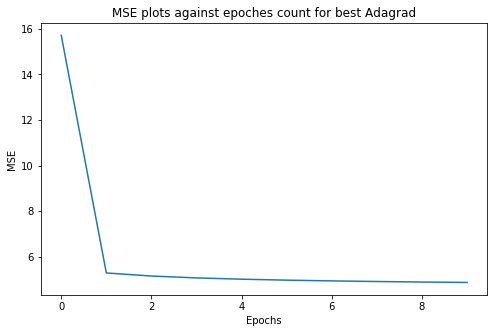

Second smallest mse: 6.32818839959 reg const: 0 learning rate: 100


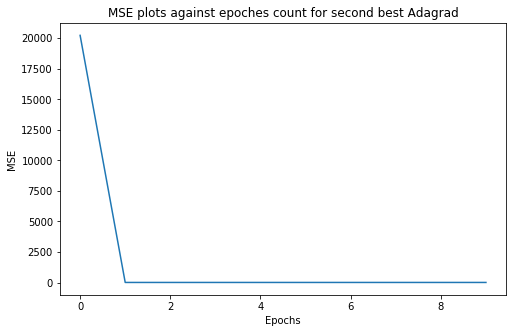

In [3]:
losses = []
mses = []
regConsts = []
learningRates = []
num_epochs = 10
for learning_rate in [.0001, .001, .01, 0.1, 1, 10, 100]:
    for regularization_constant in [0,10,100]:
        mySGD = SGD(learning_rate, regularization_constant, 10)
        mySGD.fit(X_train, y_train, "adagrad")
        losses.append(mySGD.losses)
        mses.append(mySGD.mses)
        regConsts.append(regularization_constant)
        learningRates.append(learning_rate)

print("\nAdagrad:")
print("Smallest mse:", min(losses),"reg const:", regConsts[losses.index(min(losses))],"learning rate:", learningRates[losses.index(min(losses))])


fig = plt.figure(figsize=(8,5))
plt.plot(np.arange(10), mses[losses.index(min(losses))])
plt.title('MSE plots against epoches count for best Adagrad')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

regConsts.remove(regConsts[losses.index(min(losses))])
learningRates.remove(learningRates[losses.index(min(losses))])
losses.remove(min(losses))
mses.remove(mses[losses.index(min(losses))])

print("Second smallest mse:", min(losses),"reg const:", regConsts[losses.index(min(losses))],"learning rate:", learningRates[losses.index(min(losses))])


fig = plt.figure(figsize=(8,5))
plt.plot(np.arange(10), mses[losses.index(min(losses))])
plt.title('MSE plots against epoches count for second best Adagrad')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

## c)

AdaGrad allows for larger initial settings of the learning_rate because it updates the parameters so that parameters that updated a lot will be slowed down while parameters that received little updates will be have bigger learning rate to accelerate the learning process. If the learning rate is set to high for SGD, it will be hard for the algorithm to settle.

The drawback of Adagrad is that the squared gradients in the denominator accumulates over time, and eventually the learning rate will become so small that the algorithm is unable to learn anything. AdaDelta solves this problem by restricting the window of accumulated past gradients.

# 2. (6+4=10 pts) Tensor Playground
Visit http://playground.tensorflow.org for this problem

A. From the far right, select "Regression" as the problem type, and select the 2nd of the two data sets ( the right one ).  

   i) What sort of test / training loss do you get if you run it for 200 epochs with the following learning rates: .3, .01 and .003 ?  What if you run it for 1000 epochs with these learning rates?  Leave all other values at their defaults ( test/training ratio 50%, Noise 0, Batch Size 10, using Tanh activation function, and No Regularization )
   
   **200 EPOCHS**

| Learning Rate | Test loss     | Training Loss |
|:-------------:|:-------------:|:-------------:|
| 0.3           | 0.012         | 0.012         |
| 0.01          | 0.020         | 0.019         |
| 0.003         | 0.041         | 0.039         |

**1000 EPOCHS**

| Learning Rate | Test loss     | Training Loss |
|:-------------:|:-------------:|:-------------:|
| 0.3           | 0.011         | 0.011         |
| 0.01          | 0.017         | 0.015         |
| 0.003         | 0.021         | 0.019         |
   
   ii) Keeping learning rate at .3, Activation at Tanh, with all others at their defaults, and running for 200 epochs.  
     What sort of test/train loss can you achieve using only 1 neuron in the first hidden layer.  What about for 2,3 or 8 neurons?  Provide screen shots of output layer and comment on how the different output fits look and compare with one another.

| Neurons (hidden 1)| Test loss     | Training Loss |
|:-----------------:|:-------------:|:-------------:|
| 1                 | 0.044         | 0.047         |
| 2                 | 0.031         | 0.031         |
| 3                 | 0.019         | 0.018         |
| 8                 | 0.015         | 0.015         |



<img src="img/1n.png" width="200">
<img src="img/2n.png" width="200">
<img src="img/3n.png" width="200"> 
<img src="img/8n.png" width="200">

   iii)Now keeping learning rate at .03 with all others at their defaults, and running for 200 epochs.  
       Compare how the activation functions affect the ouput ( ReLU, Sigmoid, Tanh, Linear ). Provide screen shots of output results and comment.

<img src="img/relu.png" width="200">
<img src="img/sigmoid.png" width="200">
<img src="img/tanh.png" width="200"> 
<img src="img/linear.png" width="200">

B. Neural Nets can fit anything.  Now reset to the initial defaults, and select "Classification" as the problem type, and from the Data section, select the bottom right "Spriral" data set.  With the idea of trying to minimize training/testing error, provide solutions to the problem for the following 2 scenarios.  i) Using just the first 2 inputs ( as per default ) and ii) Using all 7 of the inputs.  You may use as many layers as you want, whatever activation, however man neurons.  Provide screen shots which show your full network, output and parameters. Briefly justify your decisions, and comment on difficulties/tradeoffs, what helps/what doesn't,etc. 

## ANSWER

<img src="img/2inputs.png" width="300">
The above result was trained using 5 hidden layers, each with 6 neurons. With only inputs for x1 and x2, the model is really slow on learning. We have to put a lot of hidden layers and neurons to get the best model. This is what it does best after over 1000 epochs. From the decision surface, we can still see that it does not accurately capture the data.

<img src="img/7inputs.png" width="300">
The above result was trained using 3 hidden layers: the first hidden layer has 6 neurons, the second and third layer has 3 neurons each. With all 7 inputs, the network is able to learn really fast. It settles after around 250 epochs. The number of layers and numbers of neurons for each layer are the minimum with the best performance that we come up with. We are able to use less layers and neurons because we have all 7 inputs. Since the data is a spiral, it makes sense to have inputs from sin(x1) and sin(x2) because these inputs combined with x1 and x2 will tell the angle. From the decision surface, we can see that it captures the data for the most part.

# Question 3: Multi-layer Perceptron Regressor (15 points)

In this question, you will explore the application of Multi-layer Perceptron (MLP) regression using sklearn package in Python. We will use the Appliances energy prediction dataset for this problem https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction.

Following code will pre-process the data and split the data into training and test set using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 42** and **test_size = 0.33**.
Make sure you have 56 variables and one target variable.

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import glob
%matplotlib inline

from sklearn import datasets

data = pd.read_csv('./energydata_complete.csv') 

y = data['Appliances']
X = data.drop(['date','Appliances', 'rv1', 'rv2'], axis = 1)


from dateutil import parser
timeData = np.array(data['date'])

days = []
hours = []
for line in range(len(timeData)):
    day = parser.parse(timeData[line]).weekday()
    hour = parser.parse(timeData[line]).hour
    days.append(day)
    hours.append(hour)
    
X = pd.concat([X, pd.get_dummies(days), pd.get_dummies(hours)], axis = 1)


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(13222, 56) (13222,) (6513, 56) (6513,)


One more thing to use in this problem is [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instead of fitting a model on original data, use StandardScaler to make each feature centered ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Whenever you have training and test data, fit a scaler on training data and use this scaler on test data. Here, scale only features (independent variables), not target variable y.

Use [sklearn.neural_nework.MLPRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) to do a 5-fold cross validation using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold). The cross validation must be performed on the **training data**. 

1) Use following parameter settings for MLPRegressor:

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
    batch_size=5000, learning_rate_init = 0.005
    
Now, consider three different settings for the number of hidden units:
    
   (a) *hidden_layer_sizes = (2,)* (b) *hidden_layer_sizes = (6,)* (c) *hidden_layer_sizes = (50,)*
    
   Report the average Root Mean Squared Error (RMSE) value based on your 5-fold cross validation for each model: (a), (b), and (c) (5pts)
      
2) Now, using the same number of hidden units used in part 1), train MLPRegressor models on whole training data and report RMSE score for both Train and Test set (Again, use StandardScaler). Which model works the best, (a), (b), or (c)? Briefly analyze the result in terms of the number of hidden units. (3pts)

3) MLPRegressor has a built-in attribute *loss\_curve\_* which returns the loss at each epoch (misleadingly referred to as "iteration" in scikit documentation, though they use epoch in the actual code!). For example, if your model is named as *my_model* you can call it as *my\_model.loss\_curve\_* ([example](http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py)). Plot three curves for model (a), (b), and (c) in one figure, where *X-axis* is epoch  number and *Y-axis* is squared root of *loss\_curve\_* value. (2pts)

4) Use following parameter settings for MLPRegressor:

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
    batch_size=5000, hidden_layer_sizes = (50,)
    
Now, consider three different settings for the learning rates:
    
   (i) *learning_rate_init = 0.005* (ii) *learning_rate_init = 0.01* (iii) *learning_rate_init = 1*
    
   Report the average Root Mean Squared Error (RMSE) value based on your 5-fold cross validation for each model: (i), (ii), and (iii) (5pts)


## ANSWER

## 1)

In [5]:
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)
kf = KFold(n_splits = 5)

In [6]:
mlpr = MLPRegressor(hidden_layer_sizes = 2, activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
batch_size=5000, learning_rate_init = 0.005)

rms = 0.0
for train_index, test_index in kf.split(X_train, y=y_train):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train1, X_test1 = X_train[train_index], X_train[test_index]
    y_train1, y_test1 = y_train[train_index], y_train[test_index]
    y_train1 = np.nan_to_num(y_train1)
    y_test1 = np.nan_to_num(y_test1)
    mlpr.fit(X_train1, y_train1)
    rms += np.sqrt(mean_squared_error(mlpr.predict(X_test1), y_test1))
print("Average rmse (2 layers)", rms/5)

mlpr = MLPRegressor(hidden_layer_sizes = 6, activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
batch_size=5000, learning_rate_init = 0.005)


rms = 0.0
for train_index, test_index in kf.split(X_train, y=y_train):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train1, X_test1 = X_train[train_index], X_train[test_index]
    y_train1, y_test1 = y_train[train_index], y_train[test_index]
    y_train1 = np.nan_to_num(y_train1)
    y_test1 = np.nan_to_num(y_test1)
    mlpr.fit(X_train1, y_train1)
    rms += np.sqrt(mean_squared_error(mlpr.predict(X_test1), y_test1))
print("Average rmse (6 layers)", rms/5)


mlpr = MLPRegressor(hidden_layer_sizes = 50, activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
batch_size=5000, learning_rate_init = 0.005)

rms = 0.0
for train_index, test_index in kf.split(X_train, y=y_train):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train1, X_test1 = X_train[train_index], X_train[test_index]
    y_train1, y_test1 = y_train[train_index], y_train[test_index]
    y_train1 = np.nan_to_num(y_train1)
    y_test1 = np.nan_to_num(y_test1)
    mlpr.fit(X_train1, y_train1)
    rms += np.sqrt(mean_squared_error(mlpr.predict(X_test1), y_test1))
print("Average rmse (50 layers)", rms/5)

Average rmse (2 layers) 99.7167238415
Average rmse (6 layers) 99.6761276002
Average rmse (50 layers) 103.642580137


## 2)

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import glob

import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
%matplotlib inline

from sklearn import datasets

data = pd.read_csv('./energydata_complete.csv') 

y = data['Appliances']
X = data.drop(['date','Appliances', 'rv1', 'rv2'], axis = 1)


from dateutil import parser
timeData = np.array(data['date'])

days = []
hours = []
for line in range(len(timeData)):
    day = parser.parse(timeData[line]).weekday()
    hour = parser.parse(timeData[line]).hour
    days.append(day)
    hours.append(hour)
    
X = pd.concat([X, pd.get_dummies(days), pd.get_dummies(hours)], axis = 1)


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=42)

#print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)
kf = KFold(n_splits = 5)

mlpr = MLPRegressor(hidden_layer_sizes = 2, activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
batch_size=5000, learning_rate_init = 0.005)

mlpr.fit(X_train, y_train)
print("RMSE 2 layers:", np.sqrt(mean_squared_error(mlpr.predict(X_test), y_test)))

mlpr = MLPRegressor(hidden_layer_sizes = 6, activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
batch_size=5000, learning_rate_init = 0.005)

mlpr.fit(X_train, y_train)
print("RMSE 6 layers:", np.sqrt(mean_squared_error(mlpr.predict(X_test), y_test)))

mlpr = MLPRegressor(hidden_layer_sizes = 50, activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
batch_size=5000, learning_rate_init = 0.005)

mlpr.fit(X_train, y_train)
print("RMSE 50 layers:", np.sqrt(mean_squared_error(mlpr.predict(X_test), y_test)))

RMSE 2 layers: 93.1462075832
RMSE 6 layers: 88.0993652333
RMSE 50 layers: 80.2351681709


(c) works the best. It has 50 hidden layers. This means that the model is very complicated, and in this case, it works better.

## 3)

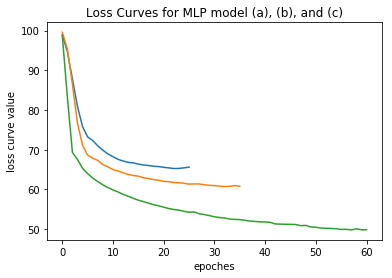

In [8]:
Mlp_reg_2 = MLPRegressor(hidden_layer_sizes = (2,), activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
batch_size=5000, learning_rate_init = 0.005)
Mlp_reg_2.fit(X_train, y_train)

Mlp_reg_6 = MLPRegressor(hidden_layer_sizes = (6,), activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
batch_size=5000, learning_rate_init = 0.005)
Mlp_reg_6.fit(X_train, y_train)

Mlp_reg_50 = MLPRegressor(hidden_layer_sizes = (50,), activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
batch_size=5000, learning_rate_init = 0.005)
Mlp_reg_50.fit(X_train, y_train)

plt.figure()
ax = plt.gca()
ax.plot(np.sqrt(Mlp_reg_2.loss_curve_))
ax.plot(np.sqrt(Mlp_reg_6.loss_curve_))
ax.plot(np.sqrt(Mlp_reg_50.loss_curve_))
plt.title('Loss Curves for MLP model (a), (b), and (c)');
plt.xlabel('epoches')
plt.ylabel('loss curve value')

## 4)

In [9]:
kf = KFold(n_splits=5)
kf.get_n_splits(X_train)

mlpr = MLPRegressor( learning_rate_init = 0.005, activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
batch_size=5000, hidden_layer_sizes = (50,))
avg_rmse = 0
for k, (train, test) in enumerate(kf.split(X_train, y_train)): 
    X_tr, X_te = X_train[train], X_train[test]
    y_tr, y_te = y_train.iloc[train], y_train.iloc[test]
    mlpr.fit(X_tr, y_tr)
    avg_rmse += np.sqrt(mean_squared_error(y_te, mlpr.predict(X_te)))

print("Average RMSE:", avg_rmse/5,"for learning_rate_init = 0.005")


mlpr = MLPRegressor(learning_rate_init = 0.01, activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
batch_size=5000, hidden_layer_sizes = (50,))
avg_rmse = 0
for k, (train, test) in enumerate(kf.split(X_train, y_train)): 
    X_tr, X_te = X_train[train], X_train[test]
    y_tr, y_te = y_train.iloc[train], y_train.iloc[test]
    mlpr.fit(X_tr, y_tr)
    avg_rmse += np.sqrt(mean_squared_error(y_te, mlpr.predict(X_te)))

print("Average RMSE:", avg_rmse/5,"for learning_rate_init = 0.01")


mlpr = MLPRegressor(learning_rate_init = 1, activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
batch_size=5000, hidden_layer_sizes = (50,))
avg_rmse = 0
for k, (train, test) in enumerate(kf.split(X_train, y_train)): 
    X_tr, X_te = X_train[train], X_train[test]
    y_tr, y_te = y_train.iloc[train], y_train.iloc[test]
    mlpr.fit(X_tr, y_tr)
    avg_rmse += np.sqrt(mean_squared_error(y_te, mlpr.predict(X_te)))

print("Average RMSE:", avg_rmse/5,"for learning_rate_init = 1")

Average RMSE: 84.0691769874 for learning_rate_init = 0.005
Average RMSE: 85.6589505034 for learning_rate_init = 0.01
Average RMSE: 3.60399934316e+15 for learning_rate_init = 1


# Question 4: (2+5+3=10 pts) Bayes Decision Theory
a. Explain what you understand by class-conditional likelihood, class priors, and posterior probability of a class given an input, and the relationship between them. Please define all symbols and equations used explicitly.
( 2 points )

b. Suppose you want to learn a binary classifier to predict whether or not a customer will buy a TV. The class label is 0 if the customer does not buy a TV and 1 if they do. For each customer, you are given two features, $x_1$ is the per hour salary and $x_2$ is the age. Assume that the class conditional distribution $p([x_1 , x_2]|C)$ is Gaussian. The mean salary and age of the people who do buy a TV is 15 and 30 respectively and that of those who don’t is 8.5 and 25. Assume that both classes of customers have the same covariance given by the Identity matrix. Further, your sales data suggests that only 1 in 3 people actually bought a TV in the last few years. Mathematically derive the (optimal) Bayes decision boundary for this problem. (5 points)

c. Now sample 100 customers from each class (C = 0, 1) under the assumed distribution and the estimated parameters and plot their features. Additionally, plot the decision boundary you obtained in the part (b) on the same plot. (3 points)

## ANSWER

## a)

Class-conditional likelyhood is the probability of some feature x being present given that it is in a specified class c.

P(x|ci)

Class priors are the likelyhood of any given datapoint being in a class. If we have n random samples and i of those samples are in class c, then P(c) = i/n

Posterior probability of a class c given an input x is 

P(c|x) = P(x|c)P(c)/P(x). 

After we have observed all class priors and class-conditional likelihoods in a system, we can generate any posterior probability in the system by traversing the data using bayes theorem. 

## b)
<img src="img/4b.JPG" height="700" width="450">

## c)

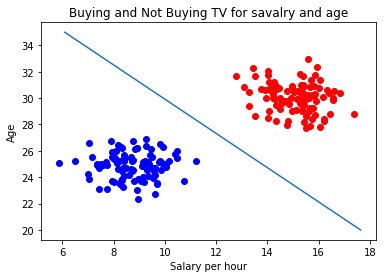

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x2=np.linspace(20,35,1000)


salary_tv, age_tv = np.random.multivariate_normal([15,30], [[1,0],[0,1]],100).T

salary_notv, age_notv = np.random.multivariate_normal([8.5,25], [[1,0],[0,1]],100).T

x1 = 33.0105 -0.769*x2
plt.plot(x1, x2)
plt.scatter(salary_notv, age_notv, color='b')
plt.scatter(salary_tv, age_tv, color='r')
plt.xlabel('Salary per hour')
plt.ylabel('Age')
plt.title('Buying and Not Buying TV for savalry and age')
plt.show()

plt.close()

# Question 5: Decision Tree using Python (10 pts)
In this problem, you will model the data using decision trees to perform a classification task. Load the BreastTissue.csv dataset in the Q1 folder. The dataset has been preprocessed. The description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Breast+Tissue). Using the class tree.DecisionTreeClassifier (http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree), build two different trees with a maximum depth of two using the split criteria (i) Gini and (ii) Entropy. Use entire data to build trees. Plot the two trees. If your classifier object is called clf, use the following commands to save the generated tree as a '.dot' file that can be used to visualize the tree using Webgraphviz: http://www.webgraphviz.com/

Hint: see  http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

In [ ]:
from sklearn import tree
from sklearn.externals.six import StringIO
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
bt = pd.read_csv("BreastTissue.csv", header = 0)
clfgini = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 2)
clfentr = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = 2)



x = bt.values[:, 2:]
y = bt.values[:, 1]
clfgini = clfgini.fit(x, y)
clfentr = clfentr.fit(x, y)



with open("decision_tree_gini.dot", 'w') as f:
    f = tree.export_graphviz(clfgini, out_file=f)

with open("decision_tree_entr.dot", 'w') as f:
    f = tree.export_graphviz(clfentr, out_file=f)

Copy paste the contents of your '.dot' file into the text window on the website to visualize the trees. At which node(s) do they differ?
## ANSWER

In both gini and entropy, there is a split for I0 (X[0]) and P (X[8]), and they are split at the same value. However, in gini P is the root and in entropy I0 is the root, so they are split in reverse order. Also, in entropy there is an additional split in the second level for Area; entropy has four leaves while gini only has three.

Gini
<img src="img/giniBT.png" width="400">

Entropy
<img src="img/entropyBT.png" width="500">